In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from concurrent.futures import ThreadPoolExecutor
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef, confusion_matrix, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset Overview**

In [11]:
x = pd.read_csv("/content/x_cleaned.csv")
y = pd.read_csv("/content/y_cleaned.csv")

In [12]:
print(x.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78095 entries, 0 to 78094
Data columns (total 47 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_0   78095 non-null  float64
 1   User_1   78095 non-null  float64
 2   User_2   78095 non-null  float64
 3   User_4   78095 non-null  float64
 4   User_5   78095 non-null  float64
 5   User_6   78095 non-null  float64
 6   User_7   78095 non-null  float64
 7   User_8   78095 non-null  float64
 8   User_9   78095 non-null  float64
 9   User_10  78095 non-null  float64
 10  User_11  78095 non-null  float64
 11  User_12  78095 non-null  float64
 12  User_13  78095 non-null  float64
 13  User_14  78095 non-null  float64
 14  X0       78095 non-null  float64
 15  Y0       78095 non-null  float64
 16  Z0       78095 non-null  float64
 17  X1       78095 non-null  float64
 18  Y1       78095 non-null  float64
 19  Z1       78095 non-null  float64
 20  X2       78095 non-null  float64
 21  Y2       780

In [13]:
x_file_name = "/content/x_cleaned.csv"
y_file_name = "/content/y_cleaned.csv"


**4.6 Train-Test spliting**

In [14]:
X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size=0.25, random_state=42)

print ( f"X_train.info() \n {X_train.info ()} \n")
print ( f"X_test.info() \n {X_test.info ()} \n")
print ( f"y_train.info() \n {y_train.info ()} \n")
print ( f"y_test.info() \n {y_test.info ()} \n")

y_train = y_train.values.ravel()  # Convert to numpy array and flatten
y_test = y_test.values.ravel()


<class 'pandas.core.frame.DataFrame'>
Index: 58571 entries, 61443 to 15795
Data columns (total 47 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_0   58571 non-null  float64
 1   User_1   58571 non-null  float64
 2   User_2   58571 non-null  float64
 3   User_4   58571 non-null  float64
 4   User_5   58571 non-null  float64
 5   User_6   58571 non-null  float64
 6   User_7   58571 non-null  float64
 7   User_8   58571 non-null  float64
 8   User_9   58571 non-null  float64
 9   User_10  58571 non-null  float64
 10  User_11  58571 non-null  float64
 11  User_12  58571 non-null  float64
 12  User_13  58571 non-null  float64
 13  User_14  58571 non-null  float64
 14  X0       58571 non-null  float64
 15  Y0       58571 non-null  float64
 16  Z0       58571 non-null  float64
 17  X1       58571 non-null  float64
 18  Y1       58571 non-null  float64
 19  Z1       58571 non-null  float64
 20  X2       58571 non-null  float64
 21  Y2       5857

**Fine tuning and Optimal and first_variable_selection**

In [15]:
import matplotlib.pyplot as plt

def plot_metrics(results_df):
    # Define metrics to plot
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
    models = results_df['Model']

    # Set up subplots
    fig, axs = plt.subplots(nrows=1, ncols=len(metrics), figsize=(20, 5))
    fig.suptitle("Model Performance Metrics", fontsize=16)

    for i, metric in enumerate(metrics):
        axs[i].bar(models, results_df[metric], color='skyblue', alpha=0.7)
        axs[i].set_title(metric)
        axs[i].set_xticklabels(models, rotation=45, ha='right')
        axs[i].set_ylabel(metric)
        axs[i].set_ylim([0, 1])  # Normalize the scale (0 to 1)

    plt.tight_layout()
    plt.show()


In [16]:
models = {
        'Random Forest': RandomForestClassifier(random_state=42, n_estimators=50),  # Reduced number of trees
        'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=100, class_weight='balanced', random_state=42),
        'Lasso Logistic Regression': LogisticRegression(solver='saga', penalty='l1', max_iter=100, class_weight='balanced', random_state=42),
        'Support Vector Machine (Linear)': SVC(kernel='linear', C=1, probability=True),
        'Support Vector Machine (Poly)': SVC(kernel='poly', C=1, degree=2, gamma='scale', coef0=0.0, probability=True),
        'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    }

param_grids = {
        'Random Forest': {'n_estimators': [50], 'max_depth': [10]},
        'Logistic Regression': {'C': [1]},
        'Lasso Logistic Regression': {'C': [1]},
        'Support Vector Machine (Linear)': {'C': [1]},
        'Support Vector Machine (Poly)': {'C': [1], 'degree': [2], 'gamma': ['scale'], 'coef0': [0.0]},
        'Decision Tree': {'max_depth': [10]},
    }


Model: Decision Tree
Precision: 0.9529624119561533
Recall: 0.9530321655398484
F1: 0.9529734638231263
MCC: 0.9412782573300059
Accuracy: 0.9530321655398484
MSE: 0.20584921122720753
Confusion Matrix: 
[[4045    6   19    1    2]
 [  14 3485   29   80  144]
 [  13   25 3925   51   30]
 [   9   88   92 3476   69]
 [   1  125   45   74 3676]]



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Precision: 0.7880325684603985
Recall: 0.7895922966605203
F1: 0.7884145316800797
MCC: 0.7370836627460225
Accuracy: 0.7895922966605203
MSE: 1.0255070682237246
Confusion Matrix: 
[[3693   13  152  100  115]
 [  40 3146  100  141  325]
 [ 246   18 3248  445   87]
 [ 177  236  279 2612  430]
 [ 165  479  160  400 2717]]

Model: Random Forest
Precision: 0.9663291662740222
Recall: 0.9658881376767056
F1: 0.965882322439901
MCC: 0.9574520452032306
Accuracy: 0.9658881376767056
MSE: 0.14146691251792665
Confusion Matrix: 
[[4051   15    7    0    0]
 [   7 3620   17   26   82]
 [  14   29 3919   44   38]
 [   7  143   52 3453   79]
 [   1   80   15   10 3815]]

Model: K-Nearest Neighbors
Precision: 0.9537372406297094
Recall: 0.9534419176398279
F1: 0.9533928318338528
MCC: 0.9418708123889823
Accuracy: 0.9534419176398279
MSE: 0.18039336201598033
Confusion Matrix: 
[[4055   12    5    1    0]
 [  17 3469   45  183   38]
 [  56    8 3907   66    7]
 [  32   48  208 3444    2]


<ipython-input-18-41b601f337db>:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mse_scores, palette='viridis')


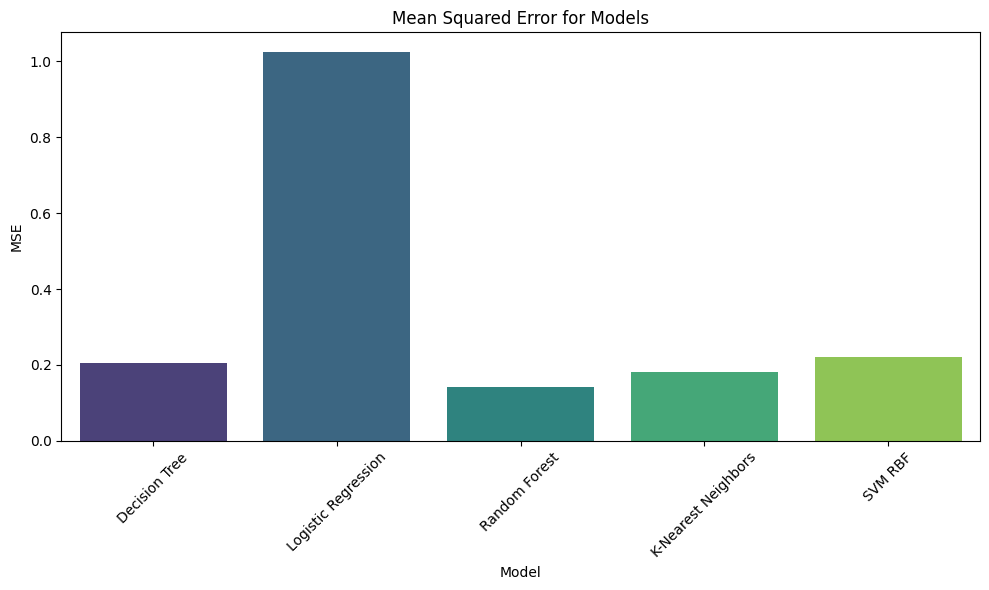

<ipython-input-15-71ca4742968c>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(models, rotation=45, ha='right')
<ipython-input-15-71ca4742968c>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(models, rotation=45, ha='right')
<ipython-input-15-71ca4742968c>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(models, rotation=45, ha='right')
<ipython-input-15-71ca4742968c>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(models, rotation=45, ha='right')
<ipython-input-15-71ca4742968c>:15: UserWarning: set_ticklabels() should only be used with a fixed number of tic

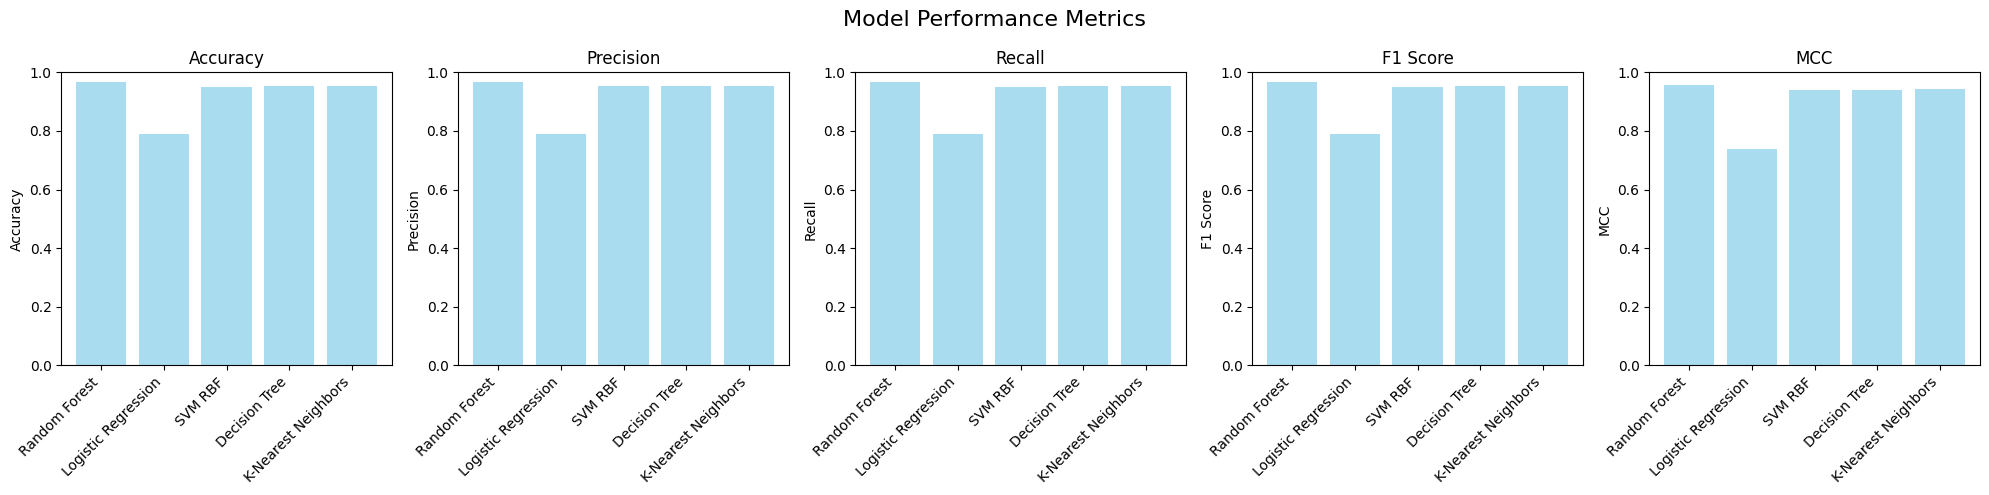

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error

def fine_tune_and_evaluate_models_with_mse(X_train, X_test, y_train, y_test, verbose=True):
    import joblib

    # Convert labels to NumPy arrays once
    y_train = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
    y_test = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

    # Define models
    models = {
        'Random Forest': RandomForestClassifier(
            n_estimators=200,
            max_depth=12,
            min_samples_split=4,
            min_samples_leaf=2,
            bootstrap=True,
            max_features='sqrt',
            random_state=42
        ),
        'Logistic Regression': LogisticRegression(
            C=5,
            solver='lbfgs',
            penalty='l2',
            max_iter=500,
            class_weight='balanced',
            random_state=42
        ),
        'SVM RBF': SVC(
            C=5,
            kernel='rbf',
            gamma='scale',
            probability=True
        ),
        'Decision Tree': DecisionTreeClassifier(
            criterion='entropy',
            max_depth=15,
            min_samples_split=6,
            min_samples_leaf=3,
            random_state=42
        ),
        'K-Nearest Neighbors': KNeighborsClassifier(
            n_neighbors=5,
            weights='uniform',
            metric='manhattan'
        )
    }

    results = []
    confusion_matrices = {}
    mse_values = {}

    def train_and_evaluate_model(name, model):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate metrics
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        mcc = matthews_corrcoef(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        confusion_matrices[name] = cm
        mse_values[name] = mse

        if verbose:
            print(f'Model: {name}')
            print(f'Precision: {precision}')
            print(f'Recall: {recall}')
            print(f'F1: {f1}')
            print(f'MCC: {mcc}')
            print(f'Accuracy: {accuracy}')
            print(f'MSE: {mse}')
            print(f'Confusion Matrix: \n{cm}\n')

        return {
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "MCC": mcc,
            "MSE": mse,
        }

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(train_and_evaluate_model, name, model) for name, model in models.items()]
        results = [future.result() for future in futures]

    results_df = pd.DataFrame(results)
    return results_df, confusion_matrices, mse_values


# Evaluate models
results_df, confusion_matrices_optimized, mse_values = fine_tune_and_evaluate_models_with_mse(X_train, X_test, y_train, y_test)

# Print results
print(results_df)


# Function to plot MSE
def plot_mse(mse_values):
    plt.figure(figsize=(10, 6))
    model_names = list(mse_values.keys())
    mse_scores = list(mse_values.values())
    sns.barplot(x=model_names, y=mse_scores, palette='viridis')
    plt.title('Mean Squared Error for Models')
    plt.ylabel('MSE')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Plot MSE
plot_mse(mse_values)

plot_metrics(results_df)



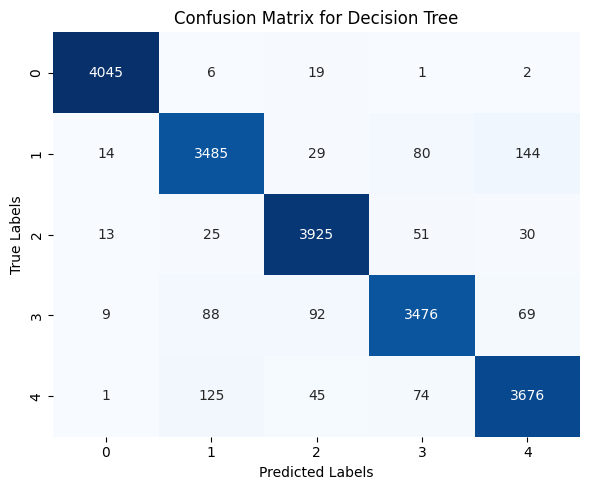

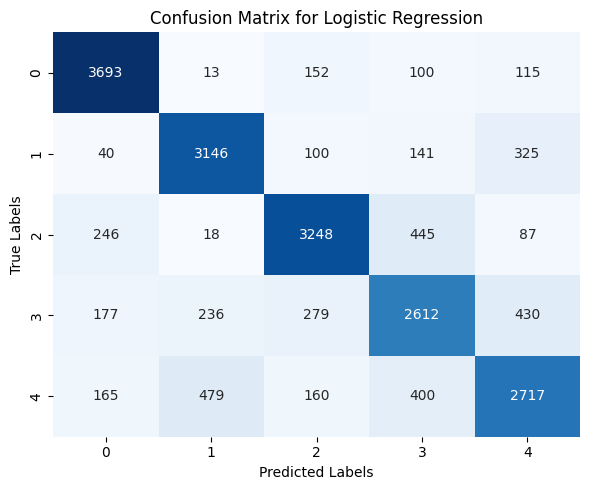

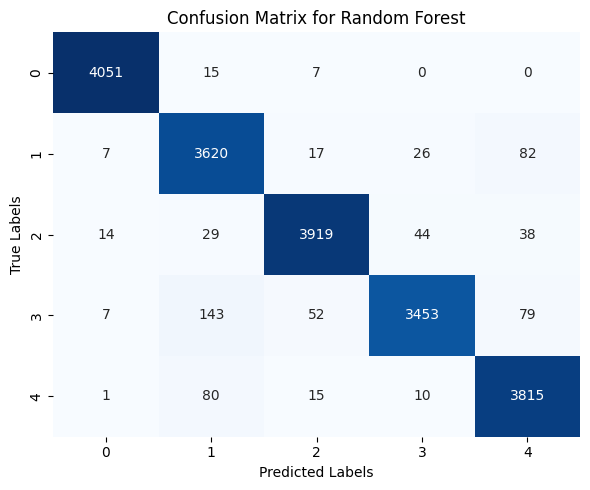

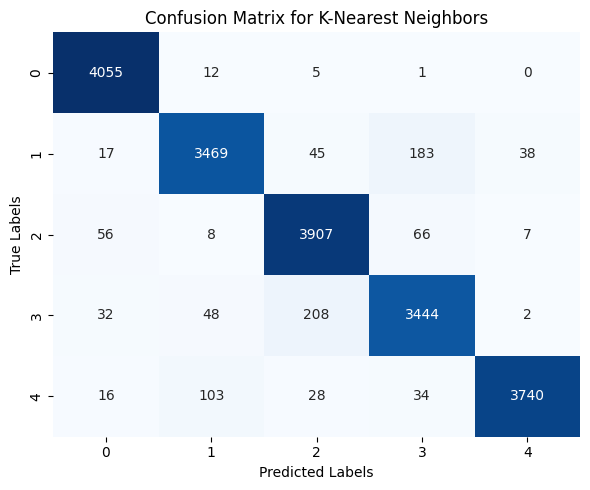

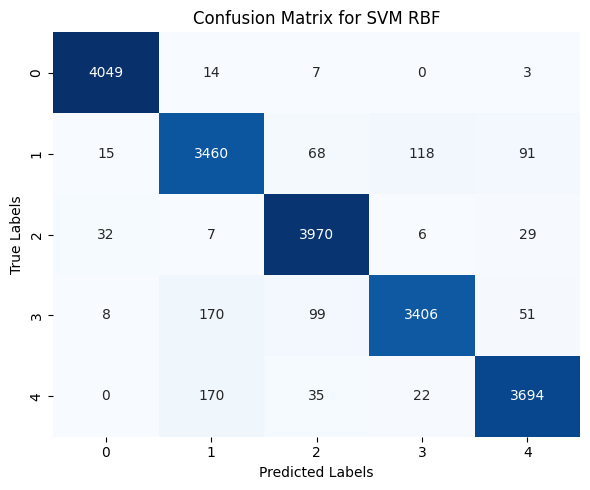

In [19]:
def plot_confusion_matrices(confusion_matrices):
    for model_name, cm in confusion_matrices.items():
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.tight_layout()
        plt.show()

plot_confusion_matrices(confusion_matrices_optimized)